In [1]:
import pandas as pd

# Problem 2: Email spam detection

Nearly every email user has at some point encountered a "spam" email, which is an unsolicited message often advertising a product, containing links to malware, or attempting to scam the recipient. 
Roughly 80-90% of more than 100 billion emails sent each day are spam emails, most being sent from botnets of malware-infected computers. 
The remainder of emails are called "ham" emails.

In [2]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/emails.csv'
emails = pd.read_csv(url)
emails.head()

,text,label
0,"Date: Wed, 21 Aug 2002 10:54:46 -05...",ham
1,"Martin A posted:\nTassos Papadopoulos, the Gre...",ham
2,Man Threatens Explosion In Moscow \n\nThursday...,ham
3,Klez: The Virus That Won't Die\n \nAlready the...,ham
4,"> in adding cream to spaghetti carbonara, whi...",ham


There are 3000 emails in the dataset

In [3]:
len(emails)

3000

2500 are ham emails, and 500 are spam

In [4]:
emails.label.value_counts()

ham     2500
spam     500
Name: label, dtype: int64

Let's look at one example of ham and one example of spam, to get a feel of what the data looks like

In [5]:
# ham example
print(emails.loc[9].text)

I have been trying to research via SA mirrors and search engines if a canned
script exists giving clients access to their user_prefs options via a
web-based CGI interface. Numerous ISPs provide this feature to clients, but
so far I can find nothing. Our configuration uses Amavis-Postfix and ClamAV
for virus filtering and Procmail with SpamAssassin for spam filtering. I
would prefer not to have to write a script myself, but will appreciate any
suggestions.



-------------------------------------------------------
This sf.net email is sponsored by: OSDN - Tired of that same old
cell phone?  Get a new here for FREE!
https://www.inphonic.com/r.asp?r=sourceforge1&refcode1=vs3390
_______________________________________________
Spamassassin-talk mailing list
Spamassassin-talk@lists.sourceforge.net
https://lists.sourceforge.net/lists/listinfo/spamassassin-talk




In [6]:
# spam example
print(emails.loc[2990].text)


Get 12 FREE VHS or DVDs!
  Click  HYPERLINK  HERE For Details!
We Only Have HIGH QUALITY Porno Movies to Choose From!
 "This is a VERY SPECIAL, LIMITED TIME OFFER." Get up to 12 DVDs absolutely FREE, with HYPERLINK  NO COMMITMENT!
There's no better deal anywhere.
There's no catches and no gimmicks. You only pay for the shipping, and the DVDs are absolutely free!
Take a Peak at our HYPERLINK   Full Catalog!
 High quality cum filled titles such as:
 HYPERLINK  500 Oral Cumshots 5
Description: 500 Oral Cum Shots! I need hot jiz on my face! Will you cum in my mouth?
 Dozens of Dirty Hardcore titles such as:
 HYPERLINK  Amazing Penetrations No. 17
Description: 4 full hours of amazing penetrations with some of the most beautiful women in porn!
 From our "Sexiest Innocent Blondes" collections:
 HYPERLINK  Audition Tapes
Description: Our girls go from cute, young and innocent, to screaming sex goddess
 beggin' to have massive cocks in their tight, wet pussies and asses!



The **goal** is to build a spam classifier

**Part 0:** Drop rows with missing values.

In [8]:
emails.dropna(inplace=True)

In [9]:
emails

,text,label
0,"Date: Wed, 21 Aug 2002 10:54:46 -05...",ham
1,"Martin A posted:\nTassos Papadopoulos, the Gre...",ham
2,Man Threatens Explosion In Moscow \n\nThursday...,ham
3,Klez: The Virus That Won't Die\n \nAlready the...,ham
4,"> in adding cream to spaghetti carbonara, whi...",ham
...,...,...
2995,\n ABC's Good Morning America ranks it the #1...,spam
2996,\n \n \n HYPERLINK\n HYPER...,spam
2997,\nTHANK YOU FOR SHOPPING WITH US\nGIFTS FOR AL...,spam
2998,\n The\n Famous\n ...,spam


**Part 1:** Define X and y from the DataFrame, and then split X and y into training and testing sets, using the text as the only feature and the label (ham/spam) as the target.

In [10]:
from sklearn.model_selection import train_test_split

# Feature matrix X, target vector y
X = emails.text
y = emails.label
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

**Part 2:** build a classification pipeline (tf-idf vectorizer + Naive Bayes model).

In [11]:
# build a classification pipeline (tf-idf vectorizer + Naive Bayes model).
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

text_clf_pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')), ('clf', MultinomialNB())])

**Part 3:** Use a grid search to tune the pipeline hyperparameters

In [13]:
from sklearn.model_selection import GridSearchCV

# define the parameter values that should be searched
parameters = {'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
              'clf__alpha': [0.01, 0.1, 1.0, 10.0],
              }
# instantiate the grid
grid_search = GridSearchCV(text_clf_pipe, parameters, cv=5, n_jobs=-1, verbose=1)
# fit the grid with data
grid_search.fit(X_train, y_train)

# view the complete results
grid_search.cv_results_

# examine the best model
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)
best_clf = grid_search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
0.9893303637713438
{'clf__alpha': 0.01, 'tfidf__ngram_range': (1, 2)}
Pipeline(steps=[('tfidf',
                 TfidfVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('clf', MultinomialNB(alpha=0.01))])


**Part 4:** Evaluate the performance of your classification pipeline on the test set

0.992


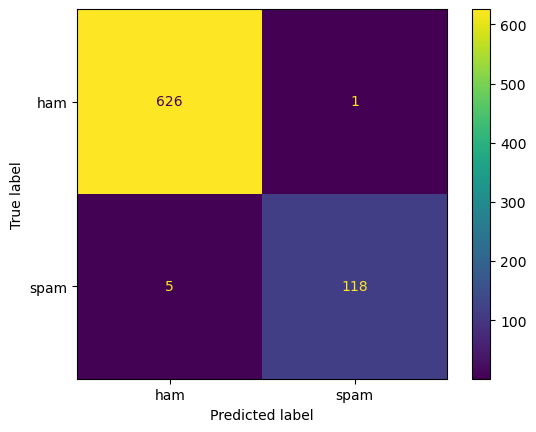

In [14]:
# Test performance
from sklearn import metrics
y_pred = best_clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

# Confusion matrix
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_pred), display_labels=['ham', 'spam']).plot()